This dataset contains information about used cars.  
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.  

__The columns in the given dataset are as follows:__  

- name  
- year  
- selling_price  
- km_driven  
- fuel  
- seller_type  
- transmission  
- Owner  
https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r'E:\Goeduhub_ML_Program_May_20\data\CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape


(4340, 8)

In [5]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [4]:
df['age']=df['year'].apply(lambda x: abs(x-2021))

In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,14
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,14
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,9
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,7


In [6]:
df.drop('year',axis=1,inplace=True)

In [7]:
df.drop('name',axis=1,inplace=True)

In [8]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,Petrol,Individual,Manual,First Owner,14
1,135000,50000,Petrol,Individual,Manual,First Owner,14
2,600000,100000,Diesel,Individual,Manual,First Owner,9
3,250000,46000,Petrol,Individual,Manual,First Owner,4
4,450000,141000,Diesel,Individual,Manual,Second Owner,7


In [9]:
final_df=pd.get_dummies(df)

In [10]:
final_df.head()

,selling_price,km_driven,age,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,14,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,135000,50000,14,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,600000,100000,9,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,250000,46000,4,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,450000,141000,7,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


<AxesSubplot:>

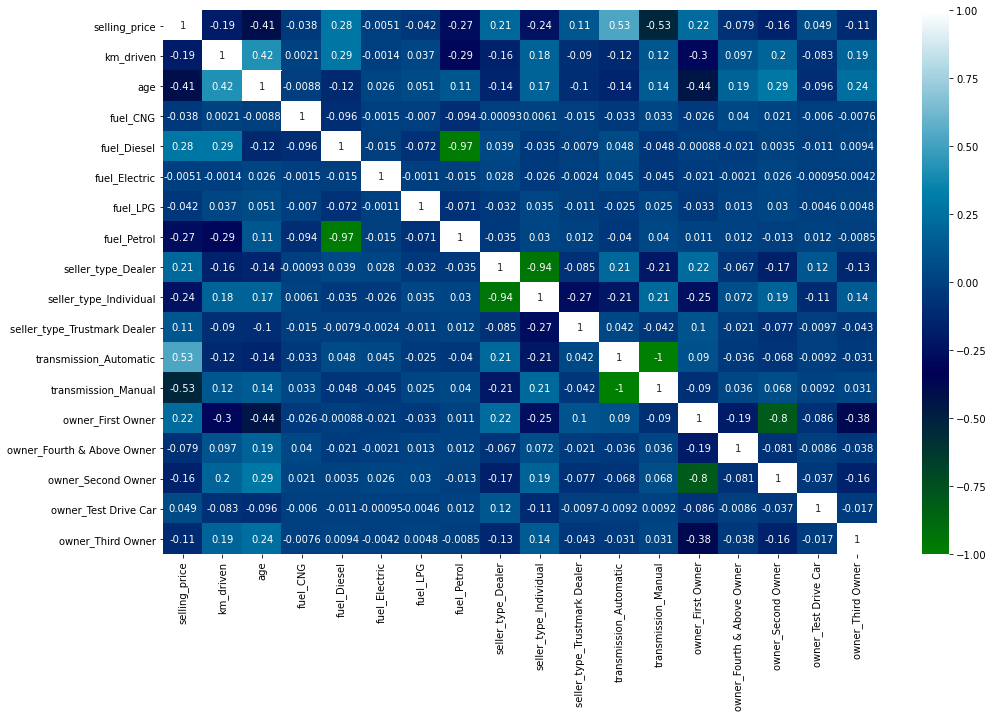

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.heatmap(final_df.corr(),annot=True,cmap='ocean')

In [11]:
x=final_df.iloc[:,1:]
y=final_df.iloc[:,0]

In [12]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.2,random_state=10)

In [28]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [31]:
ra=regressor.fit(xtrain,ytrain)

In [32]:
ra

RandomForestRegressor()

In [33]:
ra.predict(xtest)

array([ 378904.3534996 ,  400752.94965832,  186149.36507937,
        414400.        ,  308767.37595238,  464526.73701299,
        334997.88207792,  204714.16166667, 2047660.        ,
        102659.99      ,  234094.40190476,  458352.14285714,
        139686.61666667,  749521.28427128,  187010.        ,
        728759.6283425 ,  184815.34368651,  420964.64285714,
        740317.85714286, 1031200.        ,  458400.        ,
        625000.        ,  304485.42108913,  510705.82998718,
        595650.        ,  505175.        ,  760000.        ,
        268825.31746032,  624534.52380952,  182866.66666667,
        316253.25333333,  421986.47809524,  223200.        ,
        638618.57142857,  431910.        , 2570990.        ,
        177235.93722944,  285295.23809524,  580676.36888889,
        420062.1085931 , 1300000.        ,  430528.76928294,
       1199300.        ,  759745.27777778,   71843.66666667,
        697500.        ,  518654.79437229,  463116.66666667,
        128991.66666667,

In [37]:
ypred=regressor.predict(xtest)

In [35]:
ytest

1234    300000
3327    600000
1563    170000
2364    925000
2487    400000
         ...  
2156     80000
2918    459999
3881    434999
1661    300000
2362    894999
Name: selling_price, Length: 868, dtype: int64

In [39]:
ra.score(xtest,ytest)

0.6697544305148324

In [42]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[2.42519747e-01 2.41068697e-01 7.14239554e-05 1.30486723e-01
 5.30481055e-05 1.94396700e-05 1.47897488e-04 2.87237062e-02
 1.83773487e-02 6.47384105e-03 1.28844179e-01 1.63983632e-01
 2.58557054e-02 4.04596314e-04 8.98532112e-03 1.88976803e-03
 2.09492589e-03]


In [46]:
df1=pd.Series(model.feature_importances_)

<AxesSubplot:>

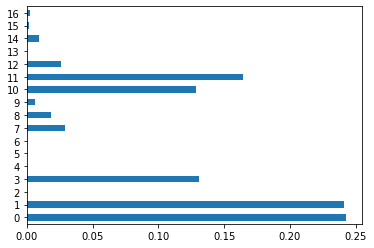

In [50]:
df1.plot(kind='barh')

In [16]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(xtrain,ytrain)
ypred=reg.predict(xtest)
from sklearn import metrics
print('mae:',metrics.mean_absolute_error(ytest,ypred))
print(',mse:',metrics.mean_squared_error(ytest,ypred))
print('rmse:',np.sqrt(metrics.mean_squared_error(ytest,ypred)))

mae: 226626.5221247761
,mse: 160157315740.06363
rmse: 400196.5963624174


In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(xtrain,ytrain)
ypred=reg.predict(xtest)
from sklearn import metrics
print('mae:',metrics.mean_absolute_error(ytest,ypred))
print(',mse:',metrics.mean_squared_error(ytest,ypred))
print('rmse:',np.sqrt(metrics.mean_squared_error(ytest,ypred)))